<a href="https://colab.research.google.com/github/vsairam-uc/GenAI-and-LLM/blob/main/multilayer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
from tensorflow.keras.layers import LeakyReLU
from IPython.display import display

## 0. Parameters

In [4]:
NUM_CLASSES = 10

## 1. Prepare the Data

In [5]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [7]:
display(x_train[:10])
print(y_train[:10])

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## 2. Build the model





In [15]:
def build_model(activation):
  input_layer = layers.Input((32, 32, 3))

  x = layers.Flatten()(input_layer)
  x = layers.Dense(200, activation=activation)(x)
  x = layers.Dense(150, activation=activation)(x)

  output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

  model = models.Model(input_layer, output_layer)

  return model


In [22]:
model_relu =build_model("relu")
model_relu.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 200)                 │         614,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 150)                 │          30,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model_leaky_relu =build_model(LeakyReLU(alpha=0.01))
model_leaky_relu.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 200)                 │         614,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 150)                 │          30,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model_sigmoid =build_model("sigmoid")
model_sigmoid.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 200)                 │         614,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 150)                 │          30,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

## 3. Train the model

In [20]:
def compile_and_train(model, x_train, y_train, x_test, y_test):
    opt = optimizers.Adam(learning_rate=0.0005)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)
    return model.evaluate(x_test, y_test)

In [26]:
relu_eval = compile_and_train(model_relu, x_train, y_train, x_test, y_test)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2843 - loss: 1.9692
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.3998 - loss: 1.6839
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4297 - loss: 1.6032
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4465 - loss: 1.5508
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4670 - loss: 1.4972
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4790 - loss: 1.4633
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.4928 - loss: 1.4246
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5011 - loss: 1.4035
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5108 - loss: 1.3763
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5127 - loss: 1.3620
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4985 - loss: 1.4065


In [27]:
leaky_relu_eval = compile_and_train(model_leaky_relu, x_train, y_train, x_test, y_test)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2915 - loss: 1.9543
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.3960 - loss: 1.6834
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4277 - loss: 1.5977
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.4507 - loss: 1.5416
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4706 - loss: 1.4905
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4798 - loss: 1.4647
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.4873 - loss: 1.4455
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4947 - loss: 1.4170
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5051 - loss: 1.3888
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5139 - loss: 1.3650
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4954 - loss: 1.4417


In [28]:
sigmoid_eval = compile_and_train(model_sigmoid, x_train, y_train, x_test, y_test)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2661 - loss: 2.0188
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3854 - loss: 1.7286
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4160 - loss: 1.6256
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4436 - loss: 1.5665
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4492 - loss: 1.5248
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4650 - loss: 1.4927
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4764 - loss: 1.4671
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4812 - loss: 1.4535
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4921 - loss: 1.4213
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4931 - loss: 1.4132
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4855 - loss: 1.4569


## 4. Evaluation Comparison

In [33]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

def predict_and_plot_random(model, x_test, y_test, n=10):
  preds = model.predict(x_test)
  preds_single = CLASSES[np.argmax(preds, axis=-1)]
  actual_single = CLASSES[np.argmax(y_test, axis=-1)]
  indices = np.random.choice(range(len(x_test)), n)

  fig = plt.figure(figsize=(15, 3))
  fig.subplots_adjust(hspace=0.4, wspace=0.4)

  for i, idx in enumerate(indices):
      img = x_test[idx]
      ax = fig.add_subplot(1, n, i + 1)
      ax.axis("off")
      ax.text(
          0.5,
          -0.35,
          "pred = " + str(preds_single[idx]),
          fontsize=10,
          ha="center",
          transform=ax.transAxes,
      )
      ax.text(
          0.5,
          -0.7,
          "act = " + str(actual_single[idx]),
          fontsize=10,
          ha="center",
          transform=ax.transAxes,
      )
      ax.imshow(img)
  plt.show()

ReLU Evaluation: [1.41647469997406, 0.4952999949455261]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


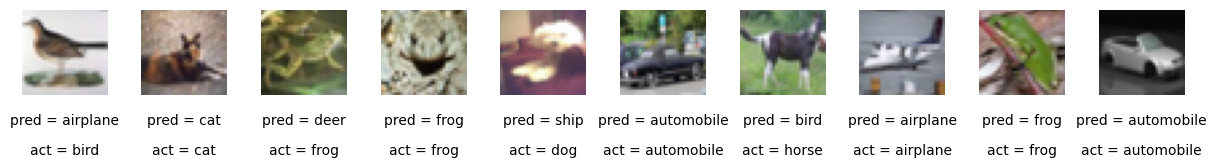

In [34]:
print(f"ReLU Evaluation: {relu_eval}")
predict_and_plot_random(model_relu, x_test, y_test)

ReLU Evaluation: [1.446565866470337, 0.490200012922287]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


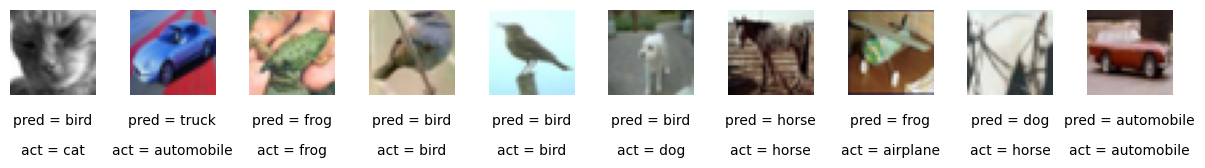

In [35]:
print(f"ReLU Evaluation: {leaky_relu_eval}")
predict_and_plot_random(model_leaky_relu, x_test, y_test)

ReLU Evaluation: [1.4712306261062622, 0.4805999994277954]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


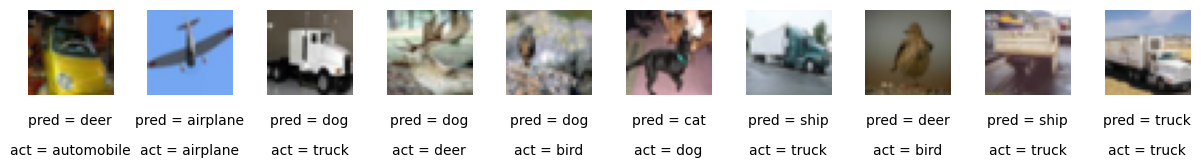

In [36]:
print(f"ReLU Evaluation: {sigmoid_eval}")
predict_and_plot_random(model_sigmoid, x_test, y_test)

In [37]:
print(f"ReLU Evaluation: {relu_eval}")
print(f"LeakyReLU Evaluation: {leaky_relu_eval}")
print(f"Sigmoid Evaluation: {sigmoid_eval}")

ReLU Evaluation: [1.41647469997406, 0.4952999949455261]
LeakyReLU Evaluation: [1.446565866470337, 0.490200012922287]
Sigmoid Evaluation: [1.4712306261062622, 0.4805999994277954]
